## Programming Exercise 6 - Support Vector Machines

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).
Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).
Step1 : Identify the hyper-plane which best separates the data points. NOTE: It must separate, if separable, if not then point is called outlier and is handled by SVM
Step2 : From the set of planes, choose the plane which has largest perpendicular distance from the points. This distance is called as Margin.
Step3 : If the data cannot be separated by the use of points, then we use other kernels: RBF or Polynomial

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import SVC
%matplotlib inline

In [14]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='o', linewidths=1)

In [15]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    # https://i.stack.imgur.com/8Mbig.png
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # concatenates along column ie. column by column
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

### Support Vector Machines

#### Example Dataset 1

In [16]:
data1 = loadmat('data/ex6data1.mat')
data1.keys()

dict_keys(['y', '__header__', '__version__', '__globals__', 'X'])

In [17]:
y1 = data1['y']
X1 = data1['X']

print('X1:', X1.shape)
print('y1:', y1.shape)



X1: (51, 2)
y1: (51, 1)


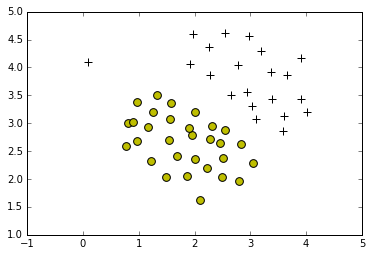

In [18]:
plotData(X1,y1)

[[-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 ..., 
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]] [[ 1.3677  1.3677  1.3677 ...,  1.3677  1.3677  1.3677]
 [ 1.3877  1.3877  1.3877 ...,  1.3877  1.3877  1.3877]
 [ 1.4077  1.4077  1.4077 ...,  1.4077  1.4077  1.4077]
 ..., 
 [ 4.8077  4.8077  4.8077 ...,  4.8077  4.8077  4.8077]
 [ 4.8277  4.8277  4.8277 ...,  4.8277  4.8277  4.8277]
 [ 4.8477  4.8477  4.8477 ...,  4.8477  4.8477  4.8477]]


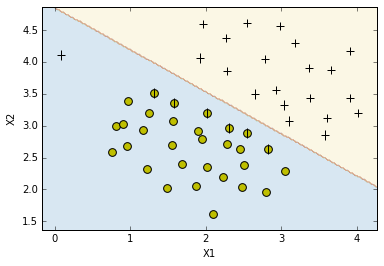

Number of support vectors:  12


In [20]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

[[-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 ..., 
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]
 [-0.163595 -0.143595 -0.123595 ...,  4.216405  4.236405  4.256405]] [[ 1.3677  1.3677  1.3677 ...,  1.3677  1.3677  1.3677]
 [ 1.3877  1.3877  1.3877 ...,  1.3877  1.3877  1.3877]
 [ 1.4077  1.4077  1.4077 ...,  1.4077  1.4077  1.4077]
 ..., 
 [ 4.8077  4.8077  4.8077 ...,  4.8077  4.8077  4.8077]
 [ 4.8277  4.8277  4.8277 ...,  4.8277  4.8277  4.8277]
 [ 4.8477  4.8477  4.8477 ...,  4.8477  4.8477  4.8477]]


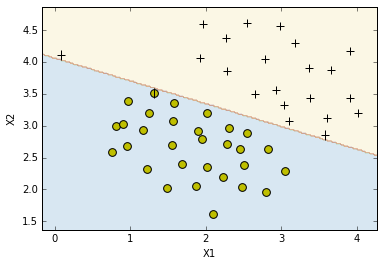

Number of support vectors:  3


In [19]:
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

#### Example Dataset 2

In [140]:
data2 = loadmat('data/ex6data2.mat')
data2.keys()

dict_keys(['y', '__version__', 'X', '__globals__', '__header__'])

In [141]:
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


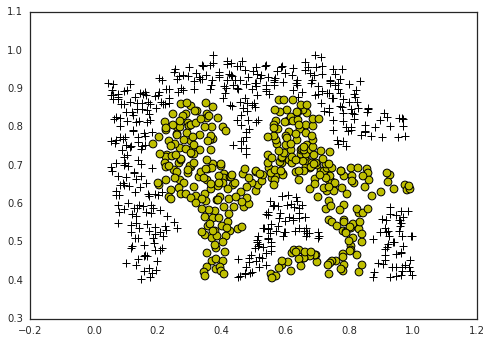

In [142]:
plotData(X2, y2)

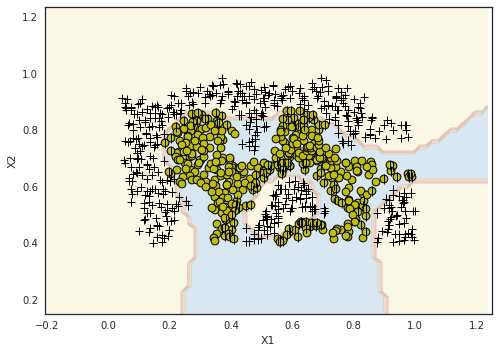

Number of support vectors:  254


In [166]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

#### Example Dataset 3

In [77]:
data3 = loadmat('data/ex6data3.mat')
data3.keys()

dict_keys(['Xval', 'y', 'yval', '__version__', 'X', '__globals__', '__header__'])

In [79]:
y3 = data3['y']
X3 = data3['X']

print('X3:', X3.shape)
print('y3:', y3.shape)

X3: (211, 2)
y3: (211, 1)


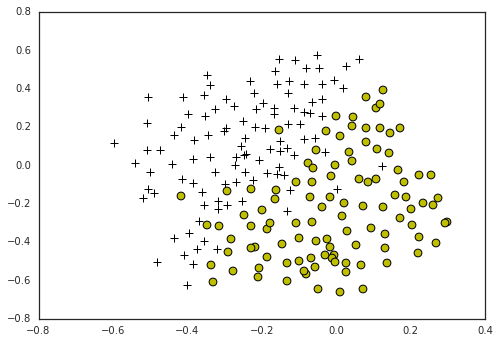

In [80]:
plotData(X3, y3)

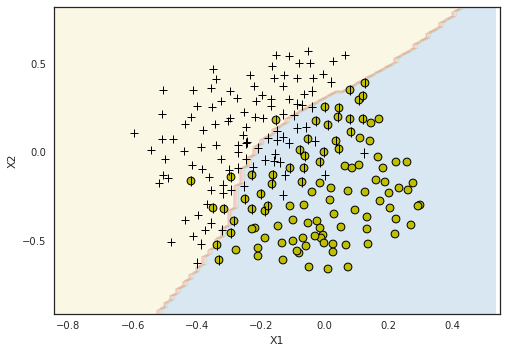

Number of support vectors:  78


In [189]:
clf3 = SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)